In [440]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [441]:
train = pd.read_csv('train_final.csv')
test = pd.read_csv('test_final.csv')

In [442]:
test.columns

Index(['Id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24'],
      dtype='object')

In [443]:
train.loc[:,'Train'] = 1
test.loc[:,'Train'] = 0

tot_df = pd.concat([train,test], ignore_index=True)

In [444]:
tot_df.head(5)

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,Train
0,1,1.0,25884,1,33.63,118596,1,0,118595,125738,1,3,1,2,121374,-2.266430,1945,118450,119184,1,121372,1,1,1,2,1,1
1,2,1.0,34346,1,10.62,118041,1,0,117902,130913,1,1,1,23,118943,-0.305612,15385,117945,292795,1,259173,1,1,1,1,1,1
2,3,1.0,34923,1,1.77,118327,1,0,117961,124402,1,2,1,1,118786,2.015561,7547,118933,290919,1,118784,1,1,1,1,1,1
3,4,1.0,80926,1,30.09,118300,1,0,117961,301218,1,0,1,1,118332,-3.172501,4933,118458,118331,1,307024,1,1,1,2,1,1
4,5,1.0,4674,1,1.77,119921,1,0,119920,302830,1,0,1,2,128231,0.573767,13836,142145,4673,1,128230,1,1,1,620,1,1


In [445]:
train.shape

(16383, 27)

In [446]:
train.describe()

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,Train
count,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,1.638300e+04,16383.000000,16383.0
mean,8192.000000,0.942135,43007.775865,1.044375,11.770938,118323.581456,1.044436,0.050052,117089.674113,169730.178600,1.041812,4.976317,1.042483,6.378380,119774.307941,0.293940,25894.316914,119045.099005,184622.040835,1.047305,125959.667765,1.044558,1.045718,1.041934,3.271890e+04,1.043948,1.0
std,4729.509065,0.233495,33611.182771,0.264806,353.187115,4518.059755,0.265601,0.293892,10261.292970,69396.677853,0.258226,65.629620,0.254664,108.216528,5609.093416,1.728999,36086.993946,18321.987129,100590.811845,0.306239,31091.344158,0.262576,0.266874,0.246597,3.184929e+06,0.259640,0.0
min,1.000000,0.000000,-1.000000,1.000000,1.770000,23779.000000,1.000000,0.000000,4292.000000,4673.000000,1.000000,0.000000,1.000000,1.000000,117880.000000,-7.446045,25.000000,4674.000000,3130.000000,1.000000,117879.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.0
25%,4096.500000,1.000000,20311.000000,1.000000,1.770000,118096.000000,1.000000,0.000000,117961.000000,117906.000000,1.000000,0.000000,1.000000,1.000000,118232.000000,-0.704562,4554.000000,118395.000000,118398.000000,1.000000,118274.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.0
50%,8192.000000,1.000000,35527.000000,1.000000,1.770000,118300.000000,1.000000,0.000000,117961.000000,128130.000000,1.000000,0.000000,1.000000,1.000000,118565.000000,1.000000,13234.000000,118929.000000,119095.000000,1.000000,118568.000000,1.000000,1.000000,1.000000,2.000000e+00,1.000000,1.0
75%,12287.500000,1.000000,74240.500000,1.000000,3.540000,118386.000000,1.000000,0.000000,117961.000000,234498.500000,1.000000,1.000000,1.000000,2.000000,119348.000000,1.000000,38902.000000,120539.000000,290919.000000,1.000000,120006.000000,1.000000,1.000000,1.000000,9.000000e+00,1.000000,1.0
max,16383.000000,1.000000,312152.000000,7.000000,43910.160000,286791.000000,9.000000,10.000000,311178.000000,311867.000000,11.000000,5036.000000,8.000000,10076.000000,270691.000000,7.398682,311696.000000,286792.000000,308574.000000,18.000000,311867.000000,8.000000,8.000000,7.000000,4.042886e+08,8.000000,1.0


In [447]:
## looks like many of these columns are categorical, lets convert them
train_decoy = train.copy()

cat_features = []
for i in range(1,25):
  if i!=14:
    cat_features.append('f' + str(i))

for feat in cat_features:
  train_decoy[feat] = train_decoy[feat].astype(str)

cat_features = train_decoy.select_dtypes(include=[np.object])

In [448]:
# investigate categorical features
cat_features.describe(include='object')

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
count,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383
unique,5170,7,168,162,8,9,118,1851,7,182,7,157,322,3555,432,67,9,322,7,8,7,906,7
top,4674,1,1.77,118300,1,0,117961,117906,1,0,1,1,118322,770,117878,290919,1,118321,1,1,1,1,1
freq,431,15807,10031,2213,15795,15745,10756,3509,15839,9965,15816,10038,2364,75,583,5561,15778,2364,15801,15775,15816,6394,15798


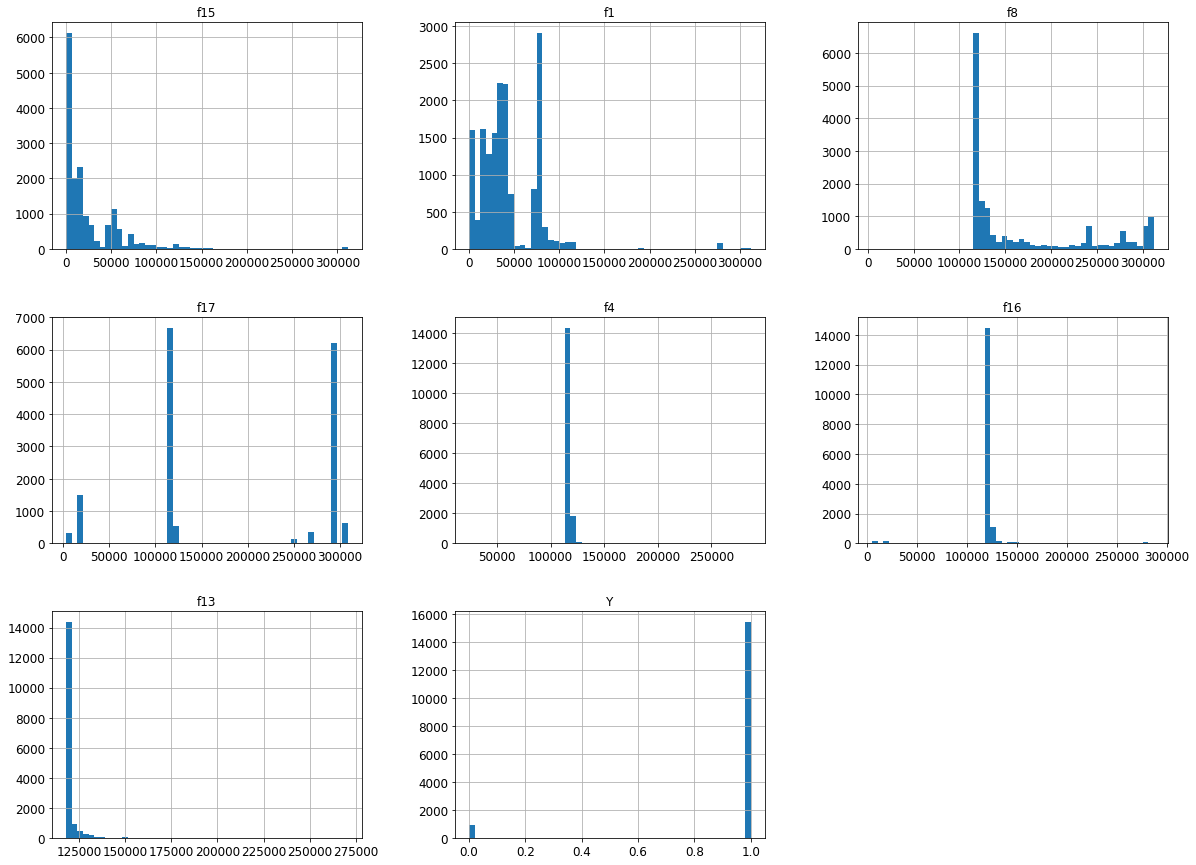

In [449]:
## ran this once and according to feature importances 

can = train[['f15', 'f1', 'f8', 'f17', 'f4', 'f16', 'f13', 'Y']]
can.hist(bins=50, figsize=(20,15))
plt.show()

In [450]:
# pd.plotting.scatter_matrix(can, figsize=(16,10));

In [451]:
corr_matrix = can.corr()

,f15,f1,f8,f17,f4,f16,f13,Y
f15,1.000000,0.004943,-0.019469,-0.119782,0.000530,-0.002317,-0.003131,-0.003840
f1,0.004943,1.000000,0.021653,0.031858,0.014199,0.029470,0.008371,-0.000444
f8,-0.019469,0.021653,1.000000,-0.184269,0.017708,-0.008580,0.091076,0.005902
f17,-0.119782,0.031858,-0.184269,1.000000,0.066988,0.035102,-0.153325,-0.006608
f4,0.000530,0.014199,0.017708,0.066988,1.000000,0.005781,0.012451,-0.000037
f16,-0.002317,0.029470,-0.008580,0.035102,0.005781,1.000000,0.010655,0.002596
f13,-0.003131,0.008371,0.091076,-0.153325,0.012451,0.010655,1.000000,0.017812
Y,-0.003840,-0.000444,0.005902,-0.006608,-0.000037,0.002596,0.017812,1.000000


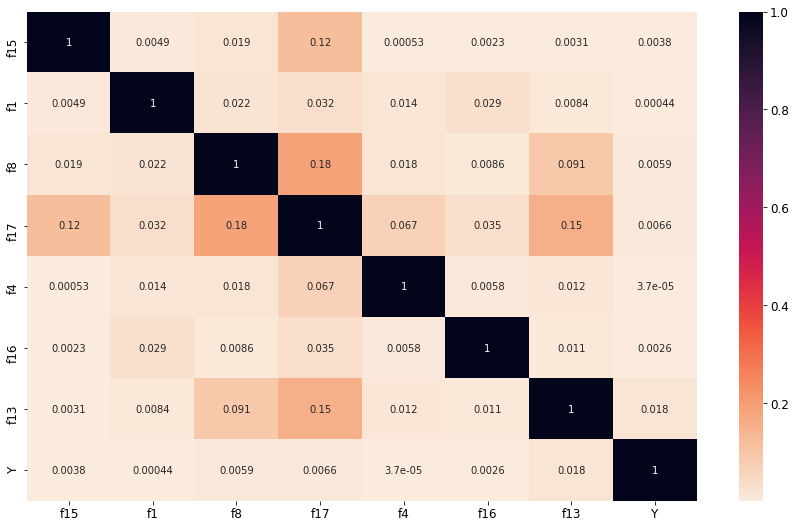

In [452]:
plt.subplots(figsize=(15,9))
cmap = sns.cm.rocket_r
sns.heatmap(corr_matrix.abs(), annot=True, cmap=cmap)
corr_matrix.head(10)

In [453]:
corrmat = train.corr()
corrmat['Y'].sort_values(ascending=False)

Y        1.000000
f14      0.031292
f13      0.017812
f24      0.016778
f6       0.015522
f20      0.011192
f11      0.008494
f8       0.005902
f12      0.005068
f21      0.004252
f10      0.003834
f5       0.003077
f16      0.002596
f23      0.002507
f3       0.002483
f22      0.001859
f18      0.001575
f19      0.000933
f4      -0.000037
f9      -0.000367
f1      -0.000444
f2      -0.000920
f15     -0.003840
f7      -0.006114
f17     -0.006608
Id      -0.009178
Train         NaN
Name: Y, dtype: float64

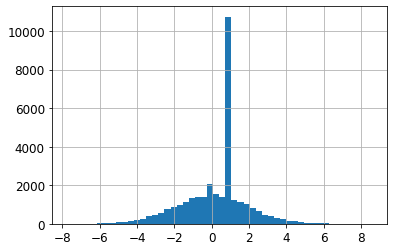

In [454]:
tot_df.f14.hist(bins=50)

In [455]:
tot_df.f14.value_counts()

 1.000000    9403
 0.000000     597
-2.744231       1
-0.772375       1
 4.391614       1
             ... 
-1.257747       1
-0.431481       1
-0.912233       1
-0.295385       1
 0.128125       1
Name: f14, Length: 22770, dtype: int64

In [456]:
tot_df['f14_1'] = tot_df.apply(lambda x: 1 if x.f14 == 1 else 0, axis=1)
tot_df['f14_0'] = tot_df.apply(lambda x: 1 if x.f14 == 0 else 0, axis=1)

In [457]:
# tot_df['new_f14'] = tot_df.apply(lambda x: 1 if x.f14!=0 else 0, axis=1)

In [458]:
train.isnull().sum().sum()

0

no missing data - but feel like the negative value in f1, could be placeholder for missing value

In [459]:
# total = tot_df.isnull().sum().sort_values(ascending=False)
# percent = (tot_df.isnull().sum()/tot_df.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(15)

In [460]:
tot_df[tot_df.f1 < 0]

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,Train,f14_1,f14_0
283,284,1.0,-1,1,1.77,118413,1,0,117961,117906,1,0,1,1,117908,2.123494,51138,119968,290919,1,117905,1,1,1,1,1,1,0,0
1121,1122,1.0,-1,1,3.54,118413,1,0,117961,240983,1,412,1,1,118786,0.362521,4583,120370,290919,1,118784,1,1,1,3,1,1,0,0
6142,6143,1.0,-1,1,10.62,118413,1,0,117961,240983,1,0,1,1,118322,-0.855739,51138,119968,290919,1,118321,1,1,1,41,1,1,0,0
6787,6788,1.0,-1,1,1.77,118413,1,0,117961,147114,1,16,1,2,118786,-0.558428,4468,119968,290919,1,118784,1,1,1,1,1,1,0,0
10914,10915,0.0,-1,1,1.77,118386,1,0,117961,118785,1,0,1,3,118786,0.000000,71215,118404,290919,2,118784,2,2,1,1,1,1,0,1
13883,13884,1.0,-1,2,8.85,118413,1,0,117961,117906,1,0,1,2,118322,1.000000,87908,120370,290919,1,118321,1,1,1,1,2,1,1,0
14043,14044,1.0,-1,1,1.77,118413,1,0,117961,117906,1,0,1,2,118786,1.000000,33,119968,290919,1,118784,1,1,1,2,1,1,1,0
14681,14682,1.0,-1,1,1.77,118413,1,0,117961,117906,1,1,1,1,118322,-1.253552,36,119968,290919,2,118321,1,1,1,7,1,1,0,0
15805,15806,1.0,-1,1,3.54,118413,1,0,117961,117906,1,1,1,3,118786,0.436809,87908,120370,290919,1,118784,1,1,1,1,1,1,0,0
17658,17659,NaN,-1,1,1.77,118413,1,0,117961,123378,1,0,1,1,118843,-1.211088,4417,119968,118643,1,118841,1,1,1,3,1,0,0,0


In [461]:
tot_df.f1.replace(-1, tot_df.f1.mode().iloc[0], inplace=True). #best model uses this
tot_df.loc[23675,'f1']

In [462]:
test = tot_df[tot_df['Train']==0]
train = tot_df[tot_df['Train']==1]
train.drop('Train', axis=1, inplace=True)
test.drop('Train', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [463]:
train[train.f14_0 == 1]['Y'].mean()

0.0

In [464]:
corrmat = train.corr()
corrmat['Y'].sort_values(ascending=False)

Y        1.000000
f14_1    0.158151
f14      0.031292
f13      0.017812
f24      0.016778
f6       0.015522
f20      0.011192
f11      0.008494
f8       0.005902
f12      0.005068
f21      0.004252
f10      0.003834
f5       0.003077
f16      0.002596
f23      0.002507
f3       0.002483
f22      0.001859
f18      0.001575
f19      0.000933
f4      -0.000037
f9      -0.000367
f1      -0.000444
f2      -0.000920
f15     -0.003840
f7      -0.006114
f17     -0.006608
Id      -0.009178
f14_0   -0.546398
Name: Y, dtype: float64

In [465]:
# (train.Y - train['f14_0']).mean()

In [466]:
train.Y.mean()

0.9421351400842336

In [467]:
train.Y.value_counts() # imbalanced

1.0    15435
0.0      948
Name: Y, dtype: int64

In [468]:
all_data = train.copy()

In [469]:
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, train_test_split

split = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
for tr_ind, test_ind in split.split(train, train['f14_0']):
    strat_train_set = train.loc[tr_ind]
    strat_val_set = train.loc[test_ind]



In [470]:
strat_train_set.Y.mean()

0.9410193804364413

In [471]:
strat_val_set.Y.mean()

0.9465974977113213

In [472]:
y_train = strat_train_set.Y.copy()
X_train = strat_train_set.copy()
X_train.drop(['Y', 'Id'], axis=1, inplace=True)


y_valid = strat_val_set.Y.copy()
X_valid = strat_val_set.copy()
X_valid.drop(['Y', 'Id'], axis=1, inplace=True)


test_ids = test.Id.copy()
test.drop(['Y','Id'], axis=1, inplace=True)

all_data_y = all_data.Y.copy()
all_data_X = all_data.copy()
all_data_X.drop(['Y','Id'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [473]:
X_train.columns

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21',
       'f22', 'f23', 'f24', 'f14_1', 'f14_0'],
      dtype='object')

In [419]:
# ### just for test
# y = train.Y.copy()
# X = train.copy()
# X.drop(['Y', 'Id'], axis=1, inplace=True)
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

In [474]:
cat_features = []
for i in range(1,25):
  if i!=14:
    cat_features.append('f' + str(i))
cat_features.extend(['f14_1',	'f14_0'])


for feat in cat_features:
  X_train[feat] = X_train[feat].astype(str)
  X_valid[feat] = X_valid[feat].astype(str)
  all_data_X[feat] = all_data_X[feat].astype(str)
  test[feat] = test[feat].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [421]:
!pip install catboost

In [422]:
from catboost import CatBoostClassifier

params = {'loss_function':'Logloss', # objective function
          'eval_metric':'AUC', # metric
          'random_seed': 42,
          'task_type': 'GPU',
          'early_stopping_rounds': 200,
          'metric_period': 20,
          'iterations': 4000,
          # 'learning_rate': 0.05, # tried 0.03, 0.07, 0.1, 0.5 # best so far 0.1
          # 'max_depth' : 4, # tried 6,8 overfit # best so far is 4
          # 'one_hot_max_size': 120, #tried 60, 100, 120, 140 # best so far 120
          # 'l2_leaf_reg': 3, 


          # 'random_strength': 4
          # 'ignored_features': ['f14']
         }
cbc = CatBoostClassifier(**params)

In [475]:
from catboost import Pool
from catboost import cv


train_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_features
                 )

valid_data = Pool(data=X_valid,
                  label=y_valid,
                  cat_features=cat_features
                 )


In [ ]:
cbc.fit(train_data, # instead of X_train, y_train
          eval_set=valid_data, # instead of (X_valid, y_valid)
          use_best_model=True, 
          plot=True, verbose=True
         );

In [476]:
all_pool = Pool(data=all_data_X,
                  label=all_data_y,
                  cat_features=cat_features
                 )

In [427]:
#saved model uses this grid
# grid = {'learning_rate': [0.03, 0.05, 0.07, 0.1],
#         'depth': [4, 6, 8],
#         'l2_leaf_reg': [1, 3, 5, 7],
#         'one_hot_max_size': [ 60, 100, 120, 180]}

grid = {'learning_rate': [0.05, 0.07, 0.1],
        'depth': [4, 6, 8],
        'l2_leaf_reg': [1, 3, 5, 7],
        'one_hot_max_size': [100, 120, 180, 220]}

grid_search_result = cbc.grid_search(grid, all_pool,
                                    cv=3,
                                    partition_random_seed=42,
                                    calc_cv_statistics=True,
                                    search_by_train_test_split=True,
                                    refit=True,
                                    shuffle=True,
                                    stratified=None,
                                    train_size=0.8,
                                    verbose=True,
                                    plot=False)

bestTest = 0.9181955457
bestIteration = 631
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.9181955	best: 0.9181955 (0)	total: 31.3s	remaining: 2h 4m 37s
bestTest = 0.9181955457
bestIteration = 631
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.9181955	best: 0.9181955 (0)	total: 1m 2s	remaining: 2h 4m 3s
bestTest = 0.9172253013
bestIteration = 670
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.9172253	best: 0.9181955 (0)	total: 1m 34s	remaining: 2h 4m 37s
bestTest = 0.9184256792
bestIteration = 731
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.9184257	best: 0.9184257 (3)	total: 2m 8s	remaining: 2h 6m 

Stopped by overfitting detector  (200 iterations wait)


In [39]:
# !pip install xgboost

In [54]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, RobustScaler
# from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
# from sklearn.impute import SimpleImputer

# num_pipeline = Pipeline([
#         ('imputer', SimpleImputer(strategy="mean")),
#         ('std_scaler', RobustScaler()),
#     ])

# # ord_pipeline = Pipeline([
# #         ("imputer", SimpleImputer(strategy="most_frequent")),
# #         ("encoder", OrdinalEncoder()),
# #     ])

# cat_pipeline = Pipeline([
#         ("imputer", SimpleImputer(strategy="most_frequent")),
#         ("encoder", OneHotEncoder(handle_unknown='ignore',sparse=False)),
#     ])

In [55]:
# from sklearn.compose import ColumnTransformer
# from sklearn.feature_selection import VarianceThreshold

# full_pipeline = ColumnTransformer([
# #         ("ord", ord_pipeline, ord_attribs),
#         # ("num", num_pipeline, num_attribs),
#         ("cat", cat_pipeline, cat_features),
#     ])

In [56]:
# X_train = full_pipeline.fit_transform(X_train)
# X_valid = full_pipeline.transform(X_valid)

# # test = full_pipeline.transform(test)

In [274]:
# # first tune for max depth and min child weight comb
# # tune for gamma
# # Tune subsample and colsample_bytree
# # Reducing Learning Rate

# import xgboost
# from xgboost import DMatrix
# train_d = DMatrix(X_train, y_train)
# eval_d = DMatrix(X_valid, y_valid)
# params = {'max_depth': 4,  #4 has been best so far #try 6
#           'eta': 0.09, # best was 0.03
#           'objective': 'binary:logistic',
#           'eval_metric': 'auc',
#           'nthread':-1,
#           'tree_method': 'gpu_hist',
#           'min_child_weight':1 , #try 1 and 3
#           'subsample': 0.9,
#           # 'gamma': 0.05,
#           'colsample_bytree':0.85,
#           'random_seed': 42
#           # 'scale_pos_weight': np.sqrt((len(train) - train.Y.sum())/(train.Y.sum()))
#           }
# gbm = xgboost.train(params, dtrain=train_d, evals=[(eval_d,'eval')], early_stopping_rounds= 200, num_boost_round=4000, verbose_eval=True)

In [ ]:
# test = full_pipeline.transform(test)
# preds = gbm.predict(DMatrix(test))

In [ ]:
# all_train_data = Pool(data=X,
#                       label=y,
#                       cat_features=cat_features
#                      )

# scores = cv(pool=all_train_data,
#             params=params, 
#             fold_count=4,
#             seed=42, 
#             shuffle=True,
#             stratified=True, # if True the folds are made by preserving the percentage of samples for each class
#             plot=True
#            )


In [272]:
feature_importance_df = cbc.get_feature_importance(data=train_data, prettified=True)
feature_importance_df

,Feature Id,Importances
0,f14_1,46.115496
1,f15,14.749410
2,f1,13.778332
3,f8,5.088654
4,f14_0,3.159871
5,f17,2.819409
6,f4,2.443655
7,f16,2.319523
8,f13,2.226415
9,f14,1.515632


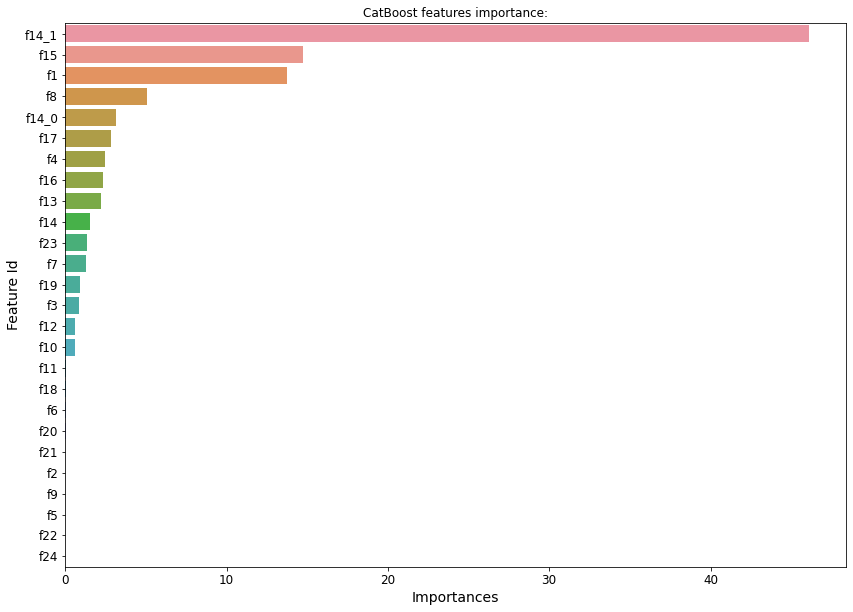

In [273]:
plt.figure(figsize=(14, 10));
sns.barplot(x="Importances", y="Feature Id", data=feature_importance_df);
plt.title('CatBoost features importance:');

In [430]:
grid_search_result["params"]

{'depth': 6, 'l2_leaf_reg': 5, 'learning_rate': 0.07, 'one_hot_max_size': 180}

In [477]:
params = {'loss_function':'Logloss', # objective function
          'eval_metric':'AUC', # metric
          'random_seed': 42,
          'task_type': 'GPU',
          'early_stopping_rounds': 200,
          'metric_period': 1,
          'iterations': 4000,
          'depth': 6,
          'l2_leaf_reg':5,
          'learning_rate': 0.07,
          'one_hot_max_size': 180}

# params = grid_search_result["params"]
best_found = CatBoostClassifier(**params)

best_found.fit(train_data, # instead of X_train, y_train
          eval_set=valid_data, # instead of (X_valid, y_valid)
          use_best_model=True, 
          plot=True, verbose=True
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5417426	test: 0.5361398	best: 0.5361398 (0)	total: 33.8ms	remaining: 2m 15s
1:	learn: 0.5557166	test: 0.5551073	best: 0.5551073 (1)	total: 72.5ms	remaining: 2m 24s
2:	learn: 0.5858795	test: 0.5277121	best: 0.5551073 (1)	total: 112ms	remaining: 2m 29s
3:	learn: 0.5869635	test: 0.5302911	best: 0.5551073 (1)	total: 148ms	remaining: 2m 28s
4:	learn: 0.5896585	test: 0.5365561	best: 0.5551073 (1)	total: 187ms	remaining: 2m 29s
5:	learn: 0.5893923	test: 0.5365561	best: 0.5551073 (1)	total: 234ms	remaining: 2m 35s
6:	learn: 0.5869171	test: 0.5375398	best: 0.5551073 (1)	total: 275ms	remaining: 2m 36s
7:	learn: 0.5853317	test: 0.5392060	best: 0.5551073 (1)	total: 310ms	remaining: 2m 34s
8:	learn: 0.6016238	test: 0.5642470	best: 0.5642470 (8)	total: 355ms	remaining: 2m 37s
9:	learn: 0.6019230	test: 0.5640904	best: 0.5642470 (8)	total: 394ms	remaining: 2m 37s
10:	learn: 0.7265396	test: 0.7080566	best: 0.7080566 (10)	total: 445ms	remaining: 2m 41s
11:	learn: 0.7798905	test: 0.7770765	be

In [439]:
best_found.save_model('best_so_far',
           format="cbm")

In [433]:
## sanity check
from sklearn.metrics import roc_auc_score

valid_test_pool = Pool(data=X_valid,
                  cat_features=cat_features
                 )


# preds = gbm.predict(DMatrix(X_valid))
# preds = cbc.predict_proba(valid_test_pool)
preds = best_found.predict_proba(valid_test_pool)



preds_df = pd.DataFrame({'Y':preds[:,1]})
# preds_df.loc[preds_df['new_f14']==0, 'Y'] = 0
# preds_df.drop('new_f14', axis=1, inplace=True)


roc_auc_score(y_valid, preds_df['Y'])

0.9166510085659023

In [435]:
test_data = Pool(data=test,
                  cat_features=cat_features
                 )

preds = cbc.predict_proba(test_data)
preds_df = pd.DataFrame({'Id': test_ids, 'Y':preds[:,1]})


preds_df.to_csv('submission.csv', index=False)